<a href="https://colab.research.google.com/github/shila121/projects/blob/main/recipe_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forming The DataSet

In [1]:
# start
import pandas as pd
aisles = pd.read_csv('aisles.csv') #---
orders = pd.read_csv('orders.csv')#---
products = pd.read_csv('products.csv') #---
departments = pd.read_csv('departments.csv')#---
order_products__prior = pd.read_csv('order_products__prior.csv')#
order_products__train = pd.read_csv('order_products__train.csv')#---

In [2]:
# visualize aisles data

print(aisles.head())
print(aisles.shape,aisles.columns)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
(134, 2) Index(['aisle_id', 'aisle'], dtype='object')


In [3]:
# visualize departments data

print(departments.head())
print(departments.shape,departments.columns)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
(21, 2) Index(['department_id', 'department'], dtype='object')


In [4]:
# visualize products data

print(products.head())
print(products.shape,products.columns)

   product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]
(49688, 4) Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [5]:
# visualize orders data

print(orders.head())
print(orders.shape,orders.columns)

   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]
(3421083, 7) Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [6]:
# Combining datasets

# df_product1 = products + aisles
# df_product2 = df_product1 + departments
# df_order_product = order_products__train + df_product2
# df0 = orders + df_order_product

In [7]:
# merge data (df_product1) : products and aisles

df_product1 = pd.merge(products,aisles , on = 'aisle_id')

In [8]:
# visualize df_product1 data

print(df_product1.head())
print(df_product1.shape,df_product1.columns)

   product_id  ...          aisle
0           1  ...  cookies cakes
1          78  ...  cookies cakes
2         102  ...  cookies cakes
3         172  ...  cookies cakes
4         285  ...  cookies cakes

[5 rows x 5 columns]
(49688, 5) Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle'], dtype='object')


In [9]:
# merge data (df_product2) : df_product1 and departments

df_product2 = pd.merge(df_product1,departments , on = 'department_id')

# visualize df_product2 data

print(df_product2.head())
print(df_product2.shape,df_product2.columns)

   product_id  ... department
0           1  ...     snacks
1          78  ...     snacks
2         102  ...     snacks
3         172  ...     snacks
4         285  ...     snacks

[5 rows x 6 columns]
(49688, 6) Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department'],
      dtype='object')


In [10]:
orders['user_id'].value_counts()

53684     100
201623    100
50817     100
176951    100
88911     100
         ... 
24224       4
199509      4
32420       4
21310       4
196830      4
Name: user_id, Length: 206209, dtype: int64

In [11]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [12]:
# # visualize order_products__prior data


print(order_products__prior.head())
print(order_products__prior.shape,order_products__prior.columns)

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1        1.0
1         2       28985                  2        1.0
2         2        9327                  3        0.0
3         2       45918                  4        1.0
4         2       30035                  5        0.0
(11858051, 4) Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [13]:
# visualize order_products__train data

print(order_products__train.head())
print(order_products__train.shape,order_products__train.columns)

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
(1384617, 4) Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [14]:
# merge data (df_order_product) : order_products__train and df_product2

df_order_product = pd.merge(order_products__train,df_product2 , on ='product_id')

# visualize df_order_product data

print(df_order_product.head())
print(df_order_product.shape,df_order_product.columns)

   order_id  product_id  add_to_cart_order  ...  department_id   aisle  department
0         1       49302                  1  ...             16  yogurt  dairy eggs
1    816049       49302                  7  ...             16  yogurt  dairy eggs
2   1242203       49302                  1  ...             16  yogurt  dairy eggs
3   1383349       49302                 11  ...             16  yogurt  dairy eggs
4   1787378       49302                  8  ...             16  yogurt  dairy eggs

[5 rows x 9 columns]
(1384617, 9) Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department'],
      dtype='object')


In [15]:
# merge data (data) : orders and df_order_product

data = pd.merge(orders,df_order_product,on = 'order_id')

# visualize data data

print(data.head())
print(data.shape,data.columns)

# variable 'data' is complete dataset

   order_id  user_id eval_set  ...  department_id        aisle  department
0   1187899        1    train  ...             16        cream  dairy eggs
1   1187899        1    train  ...              7  soft drinks   beverages
2   1187899        1    train  ...              7  soft drinks   beverages
3   1187899        1    train  ...             16         milk  dairy eggs
4   1187899        1    train  ...             16       yogurt  dairy eggs

[5 rows x 15 columns]
(1384617, 15) Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle', 'department'],
      dtype='object')


In [16]:
# we drop the below columns 
data.drop(['order_id','user_id','product_id','department_id','order_number'],inplace = True,axis = 1)

# 1.Framing the problem statement
Here, we are tring to predict whether the products can  be re-ordered or not.



# 2.Data Analysis
Here,we will try to anlyse the data by different methods as as below:

*   Step 1:Hypothesis Testing
*   Step 2:EDA(univariate / Bivariate)
*   Step 3:Missing data
*   Step 4:Numerical data
*   Step 5:Outliers
*   LStep 6:Categorical data






In [17]:
# Step 1. Hypothesis testing
# -----------------------------------------
# Null Hypothesis : there is no relationship between the predictors and the target
# Alternate Hypothesis:there is significant relationship between the predictors and the target


# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# visualize data

print(data.head())
print(data.columns,len(data.columns),data.shape)
print()

# get categorical columns of data
catCols = data.select_dtypes('object').columns

print('categorical columns of data:',catCols,len(catCols))


# get numerical columns of data
numCols = data.select_dtypes('number').columns

print('numerical columns of data:',numCols,len(numCols))

# visualize the target
print(data['reordered'].unique())


  eval_set  order_dow  order_hour_of_day  ...  aisle_id        aisle  department
0    train          4                  8  ...        53        cream  dairy eggs
1    train          4                  8  ...        77  soft drinks   beverages
2    train          4                  8  ...        77  soft drinks   beverages
3    train          4                  8  ...        84         milk  dairy eggs
4    train          4                  8  ...       120       yogurt  dairy eggs

[5 rows x 10 columns]
Index(['eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'aisle',
       'department'],
      dtype='object') 10 (1384617, 10)

categorical columns of data: Index(['eval_set', 'product_name', 'aisle', 'department'], dtype='object') 4
numerical columns of data: Index(['order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'aisle_id'],
      dtype='objec

In [18]:
# we will carry out z-test on the numerical columns to know their impact

from statsmodels.stats import weightstats as stests

significant_numCols ,in_signifiacnt_numCols = [],[]

for i in numCols:
  if i != 'reordered':
    p_val = stests.ztest(data[i],data.reordered)
    p_val = p_val[1]
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_numCols.append(i)
      print(status)
      print('*'*80)
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_signifiacnt_numCols.append(i)
      print(status)
      print('*'*80)

print('significant numerical columns :',significant_numCols,len(significant_numCols))
print('in-significant numerical columns:',in_signifiacnt_numCols,len(in_signifiacnt_numCols))

columns: order_dow p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
columns: order_hour_of_day p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
columns: days_since_prior_order p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
columns: add_to_cart_order p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
columns: aisle_id p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
significant numerical columns : ['order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'aisle_id'] 5
in-significant numerical columns: [] 0


In [19]:
# we will carry out chi-square test on the categorical columns to know their impact

from scipy.stats import chi2_contingency

significant_catCols,in_significant_catCols = [],[]

for i in catCols:
  if i != 'reordered':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.reordered))
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_catCols.append(i)
      print(status)
      print('*'*80)
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_significant_catCols.append(i)
      print(status)
      print('*'*80)

print('significant categorical columns :',significant_catCols,len(significant_catCols))
print('in-significant categorical columns:',in_significant_catCols,len(in_significant_catCols))

columns: eval_set p_val: 1.0
Accept Null Hypothesis,Insignificant predictors
********************************************************************************
columns: product_name p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
columns: aisle p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
columns: department p_val: 0.0
Reject Null Hypothesis,Significant predictor
********************************************************************************
significant categorical columns : ['product_name', 'aisle', 'department'] 3
in-significant categorical columns: ['eval_set'] 1


not able to plot: order_dow
not able to plot: order_hour_of_day
not able to plot: days_since_prior_order
not able to plot: add_to_cart_order
not able to plot: reordered
not able to plot: aisle_id


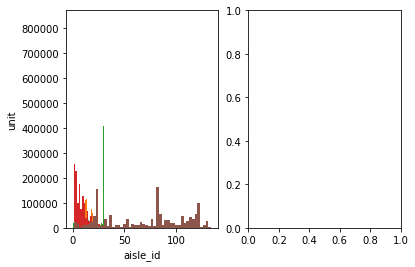

In [20]:
# univariate analysis of numerical columns by histogram and boxplot
for i in numCols:
  try:
    plt.subplot(1,2,1)
    plt.hist(data[i],bins = 50)
    plt.xlabel(i)
    plt.ylabel('unit')

    plt.subplot(1,2,2)
    plt.box(data[i],bins = 50)
    plt.xlabel(i)
    plt.ylabel('unit')
    plt.show()
  except:
    print('not able to plot:',i)
    pass

In [21]:
# univariate analysis of categorical columns by value_counts
for i in catCols:
  # print('*'*80)
  print('column:',i)
  print('*'*80)
  print(data[i].value_counts())
  print('*'*80)

column: eval_set
********************************************************************************
train    1384617
Name: eval_set, dtype: int64
********************************************************************************
column: product_name
********************************************************************************
Banana                              18726
Bag of Organic Bananas              15480
Organic Strawberries                10894
Organic Baby Spinach                 9784
Large Lemon                          8135
                                    ...  
Vitamin B6 100 mg Tablets               1
Banana Walnut Hemp Manna Bread          1
Black Ink 1.4 mm Ball Point Pens        1
Hencho en Mexico                        1
Cabbage Soup                            1
Name: product_name, Length: 39123, dtype: int64
********************************************************************************
column: aisle
********************************************************************

                        order_dow  order_hour_of_day  ...  reordered  aisle_id
order_dow                1.000000           0.005910  ...  -0.006714 -0.002933
order_hour_of_day        0.005910           1.000000  ...  -0.017840 -0.001078
days_since_prior_order  -0.026765           0.005184  ...  -0.160152  0.006088
add_to_cart_order       -0.019353          -0.008905  ...  -0.146393  0.010887
reordered               -0.006714          -0.017840  ...   1.000000 -0.000172
aisle_id                -0.002933          -0.001078  ...  -0.000172  1.000000

[6 rows x 6 columns]


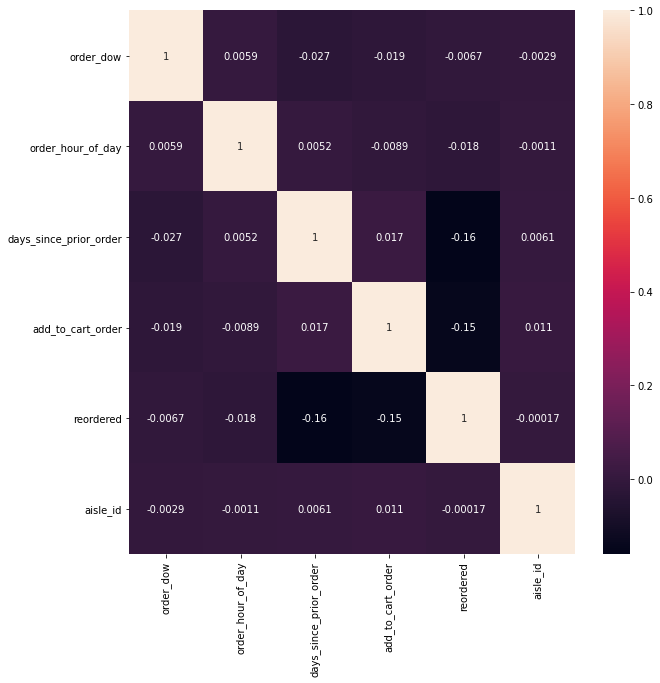

In [22]:
# Bi-variate analysis of numerical columns by co-relation mation

import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize =(10,10))
sns.heatmap(matrix,annot= True)

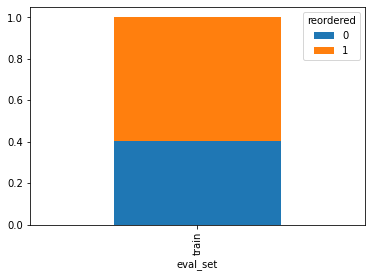

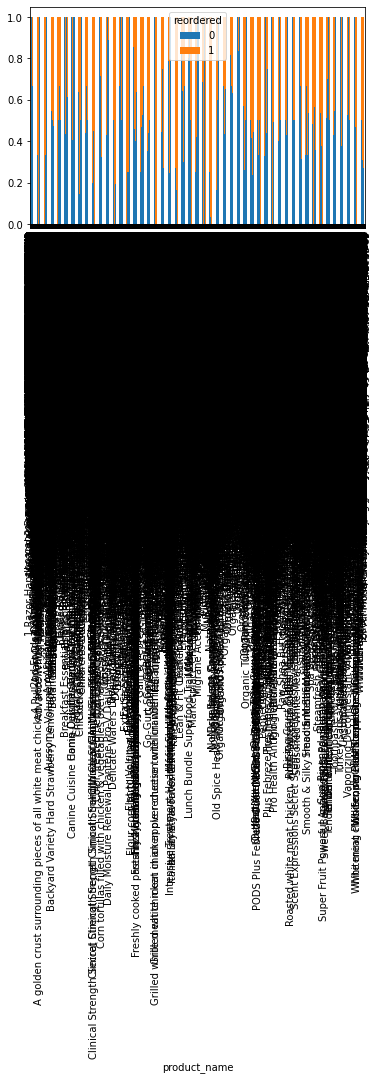

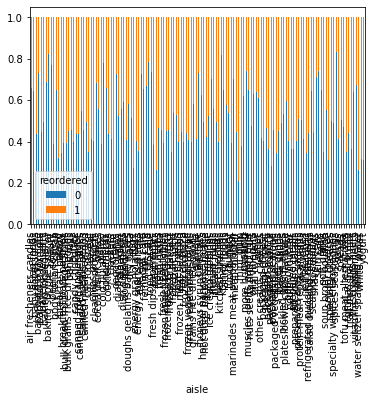

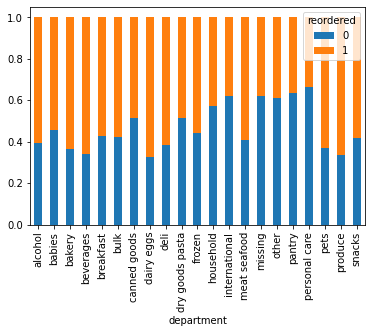

In [23]:
# Bi-variate analysis of categorical data
for i in catCols:
  try:
    category = pd.crosstab(data[i],data['reordered'])
    category.div(category.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
    plt.show()
  except:
    print('not able to plot:',i)
    pass

#Step 3. Missing Data 

In [24]:
# let us analyse if the data contains any missing values

print(data.isnull().sum())
# No missing data present in the data 

eval_set                  0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
aisle                     0
department                0
dtype: int64


# Step 4:Numerical Data Analysis

In [25]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize numerical columns
print(data[numCols].head())
print('*'*80)

# ->2. make a list of descrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('discrete numerical columns',discrete_numCols,len(discrete_numCols))
print('*'*80)

# ->3. visualize discrete numerical columns
print(data[discrete_numCols].head())
print('*'*80)

# ->4. make a list of continuous numerical columns
continous_numCols = [var for var in numCols if len(data[var].unique()>20)]
print('continuous numerical columns',continous_numCols,len(continous_numCols))
print('*'*80)

# ->5. visualize continuous numerical columns
print(data[continous_numCols].head())
print('*'*80)

numerical columns: Index(['order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'aisle_id'],
      dtype='object') 6
   order_dow  order_hour_of_day  ...  reordered  aisle_id
0          4                  8  ...          1        53
1          4                  8  ...          1        77
2          4                  8  ...          1        77
3          4                  8  ...          0        84
4          4                  8  ...          1       120

[5 rows x 6 columns]
********************************************************************************
discrete numerical columns ['order_dow', 'reordered'] 2
********************************************************************************
   order_dow  reordered
0          4          1
1          4          1
2          4          1
3          4          0
4          4          1
********************************************************************************
continuous numerical co

# Step 5. Outlier Analysis

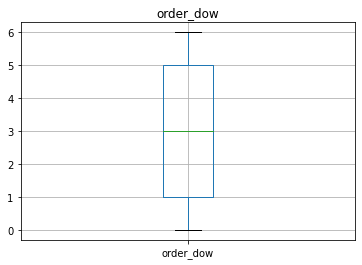

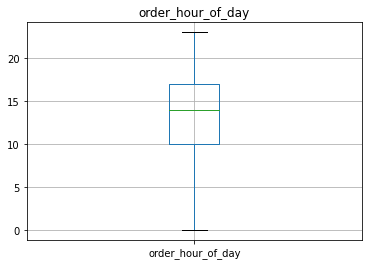

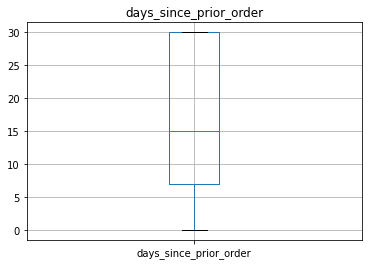

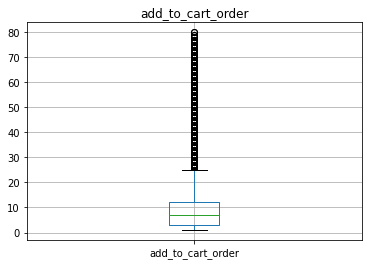

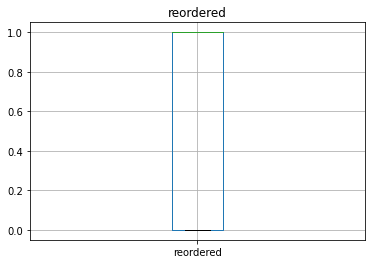

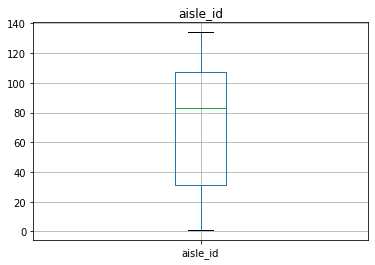

In [26]:
def find_outliers(df,var):
  df= df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()

for i in continous_numCols:
  find_outliers(data,i)

# Step 6. Categorical data Analysis

In [27]:
# -> 1. visualize the categorical data
print('categorical columns:',catCols,len(catCols))
print('*'*80)
print(data[catCols].head())
print('*'*80)

# -> 2. cardinality of categorical columns
print('cardinality of columns:')
print(data[catCols].nunique())
print('*'*80)

# -> 3. analyse rare columns
def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['reordered'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(i)
  print('*'*80)
  print(analyse_rare_vars(data,i,0.01))
  print()



categorical columns: Index(['eval_set', 'product_name', 'aisle', 'department'], dtype='object') 4
********************************************************************************
  eval_set              product_name        aisle  department
0    train       Organic Half & Half        cream  dairy eggs
1    train         Zero Calorie Cola  soft drinks   beverages
2    train                      Soda  soft drinks   beverages
3    train        Organic Whole Milk         milk  dairy eggs
4    train  0% Greek Strained Yogurt       yogurt  dairy eggs
********************************************************************************
cardinality of columns:
eval_set            1
product_name    39123
aisle             134
department         21
dtype: int64
********************************************************************************
eval_set
********************************************************************************
Series([], Name: reordered, dtype: float64)

product_name
**************

#3.Feature Engineering
Here,we will deal with all the problems like below:

1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   categorical data encoding
6.   feature scaling
7.   feature selection








In [28]:
# -> 1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['reordered'],random_state = 0,test_size = 0.2 )
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1107693, 10) (276924, 10) (1107693,) (276924,)


In [29]:
# -> 2. missing value treatment
# no missing values paresent in the data so skipping this step

In [30]:
# ->step 4. handling rare labels
print('categorical columns:',catCols,len(catCols))


cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']


def find_frequent_labels(df,var,rare_percent):
  df = df.copy()
  tmp = df.groupby(var)['reordered'].count()/len(df)
  return tmp[tmp>rare_percent].index

print('categorical variables:',cat_vars,len(cat_vars))

for var in cat_vars:

  # find the frequent categories
  frequent_ls = find_frequent_labels(X_train,var,0.01)

  # replace rarecategorical columns with 'Rare' labels
  X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')

  X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')

categorical columns: Index(['eval_set', 'product_name', 'aisle', 'department'], dtype='object') 4
categorical variables: ['eval_set', 'product_name', 'aisle', 'department'] 4


In [31]:
#  -> 5.Encoding categorical variables
def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'reordered')

print(X_train.shape,X_test.shape)
print(X_train.head())

(1107693, 10) (276924, 10)
        eval_set  order_dow  order_hour_of_day  ...  aisle_id  aisle  department
538808         0          0                 12  ...        86     21          15
692321         0          1                 20  ...       123     17          14
275633         0          5                 12  ...       108      2          15
747085         0          2                  9  ...       112     18          12
50621          0          4                 14  ...        81      2           4

[5 rows x 10 columns]


In [32]:
X_train.product_name.unique()

array([0, 1, 2])

In [33]:
# -> 6.feature scaling
train_vars = [var for var in X_train.columns if var not in ['reordered']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'product_name', 'aisle_id', 'aisle', 'department'] 9


In [34]:
# -> 7. feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['reordered']
y_test = X_test['reordered']

# drop unnecessary variables from our training and testing sets
X_train.drop(['reordered'], axis=1, inplace=True)
X_test.drop(['reordered'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

        eval_set  order_dow  order_hour_of_day  ...  aisle_id     aisle  department
538808       0.0      -0.75          -0.285714  ...  0.039474  0.800000    0.285714
692321       0.0      -0.50           0.857143  ...  0.526316  0.533333    0.142857
275633       0.0       0.50          -0.285714  ...  0.328947 -0.466667    0.285714
747085       0.0      -0.25          -0.714286  ...  0.381579  0.600000   -0.142857
50621        0.0       0.25           0.000000  ... -0.026316 -0.466667   -1.285714

[5 rows x 10 columns]


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [35]:
sel_.get_support()

array([False, False,  True,  True,  True,  True, False,  True,  True])

In [36]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 9
selected features: 6
features with coefficients shrank to zero: 3


In [37]:
# print the selected features
selected_feats

Index(['order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'product_name', 'aisle', 'department'],
      dtype='object')

In [38]:
# Checking which model will perform better

# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


# 1- Logistic Regression
# 2- K-nearest neighbors classification
# 3- support vector machine
# 4- naive bayes
# 5- random forest classification
# -----------------------------------
# Function to calculate mean absolute error

def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  
  # print('Name:',name)
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)

Name: Logistic Regression ,Cross Validation Score = 0.6396
Name: Linear svc ,Cross Validation Score = 0.6397
Name: Random forest classifier ,Cross Validation Score = 0.6162
Name: knn  ,Cross Validation Score = 0.6129
Name: Guassian NB  ,Cross Validation Score = 0.5913
Name: Decision TreeClassifier ,Cross Validation Score = 0.5776
Name: xg booster ,Cross Validation Score = 0.6535


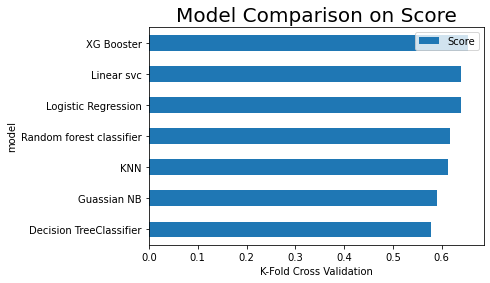

In [40]:
#model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Decision TreeClassifier','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()


In [41]:
# Model selected:xg booster
from xgboost import XGBClassifier
clf = XGBClassifier(random_state = 96)
clf.fit(X_train,y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
acc_log_reg

65.36

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[ 45975  65136]
 [ 30655 135158]]
0.654089208591527


In [43]:

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49    111111
           1       0.67      0.82      0.74    165813

    accuracy                           0.65    276924
   macro avg       0.64      0.61      0.61    276924
weighted avg       0.64      0.65      0.64    276924

